In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
df = pd.read_csv("/content/drive/MyDrive/chess_datas1 - Sheet1.csv")


In [ ]:
df.dtypes

,0
Date,object
Chess Played?,object
Digit Span (Before),int64
Digit Span (After),int64
Digit Span Difference,int64


In [ ]:
df.head()

,Date,Chess Played?,Digit Span (Before),Digit Span (After),Digit Span Difference
0,2025-03-20,Yes,8,9,1
1,2025-03-21,Yes,9,10,1
2,2025-03-22,Yes,10,10,0
3,2025-03-23,Yes,12,12,0
4,2025-03-24,Yes,10,11,1


In [ ]:
df.describe()

,Digit Span (Before),Digit Span (After),Digit Span Difference
count,30.000000,30.000000,30.000000
mean,12.266667,12.833333,0.766667
std,2.258063,2.520035,1.590561
min,8.000000,7.000000,-2.000000
25%,10.000000,11.000000,0.000000
50%,12.500000,13.000000,1.000000
75%,14.000000,15.000000,1.750000
max,16.000000,17.000000,4.000000


In [ ]:
df.describe()

,Digit Span (Before),Digit Span (After),Digit Span Difference
count,30.000000,30.000000,30.000000
mean,12.266667,12.833333,0.766667
std,2.258063,2.520035,1.590561
min,8.000000,7.000000,-2.000000
25%,10.000000,11.000000,0.000000
50%,12.500000,13.000000,1.000000
75%,14.000000,15.000000,1.750000
max,16.000000,17.000000,4.000000


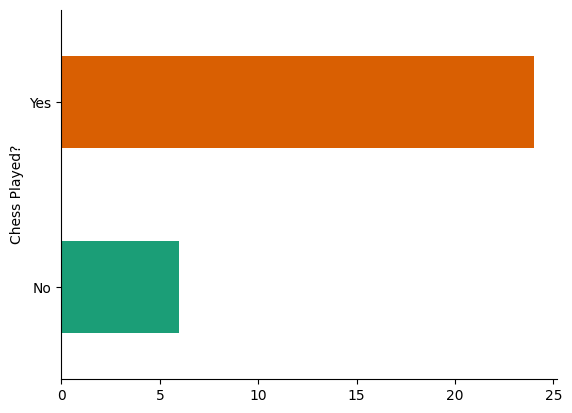

In [ ]:
# @title Chess Played?

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Chess Played?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-55-e92fc397e799>:9: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


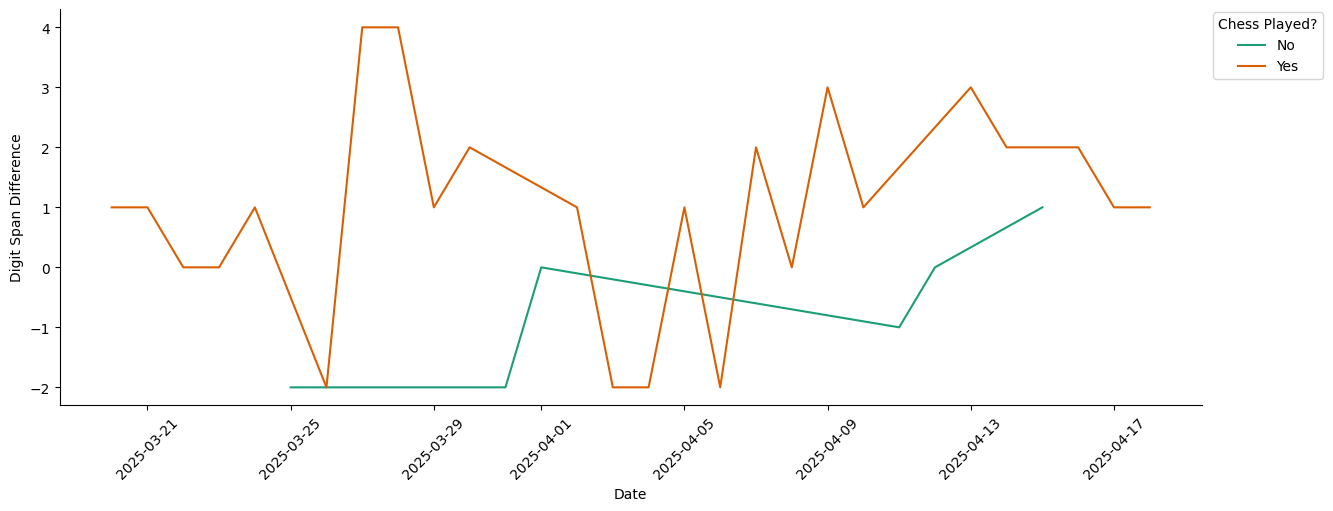

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Veri setini oku
df = pd.read_csv("/content/drive/MyDrive/processed_digit_span_data_last - processed_digit_span_data (1) - processed_digit_span_data_last - processed_digit_span_data (1).csv")

# Tarih formatını dönüştür
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Chess Played? sütununu temizle ve normalize et
df['Chess Played?'] = df['Chess Played?'].astype(str).str.strip().str.lower()
df['Chess Played?'] = df['Chess Played?'].replace({
    'yes': 'Yes',
    '1': 'Yes',
    'no': 'No',
    '0': 'No'
})

# Digit Span Difference'ı sayıya çevir ve eksik değerleri 0 yap
df['Digit Span Difference'] = pd.to_numeric(df['Digit Span Difference'], errors='coerce').fillna(0)

# Tarihe göre sırala
df_sorted = df.sort_values('Date')

# Grafik çizme fonksiyonu
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Date']
    ys = series['Digit Span Difference']
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Hazırlık ve çizim
fig, ax = plt.subplots(figsize=(12, 5), layout='constrained')
for i, (series_name, series) in enumerate(df_sorted.groupby('Chess Played?')):
    _plot_series(series, series_name, i)

fig.legend(title='Chess Played?', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Digit Span Difference')
sns.despine(fig=fig, ax=ax)
plt.show()


Correlation between Chess Played and Digit Span Improvement: 0.38, p-value: 0.0398
Linear Regression Results for Digit Span Improvement:
R^2 Score: -0.01
Mean Squared Error: 4.62


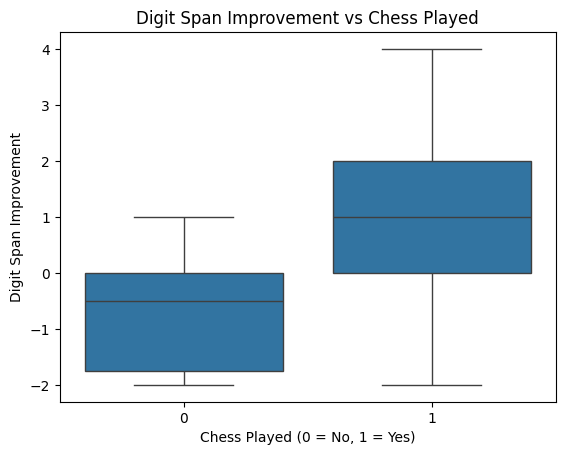

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr



# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


# Drop missing values (if any)
df.dropna(inplace=True)
df['Chess Played Binary'] = df['Chess Played?'].map({'Yes': 1, 'No': 0})

# Correlation between playing chess and improvement in digit span
correlation, p_value = pearsonr(df['Chess Played Binary'], df['Digit Span Difference'])
print(f"Correlation between Chess Played and Digit Span Improvement: {correlation:.2f}, p-value: {p_value:.4f}")

# Regression model to predict improvement in Digit Span
features = ['Digit Span (Before)', 'Chess Played Binary']
target = 'Digit Span Difference'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Linear Regression Results for Digit Span Improvement:")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

# Optional visualization
sns.boxplot(x='Chess Played Binary', y='Digit Span Difference', data=df)
plt.title("Digit Span Improvement vs Chess Played")
plt.xlabel("Chess Played (0 = No, 1 = Yes)")
plt.ylabel("Digit Span Improvement")
plt.show()


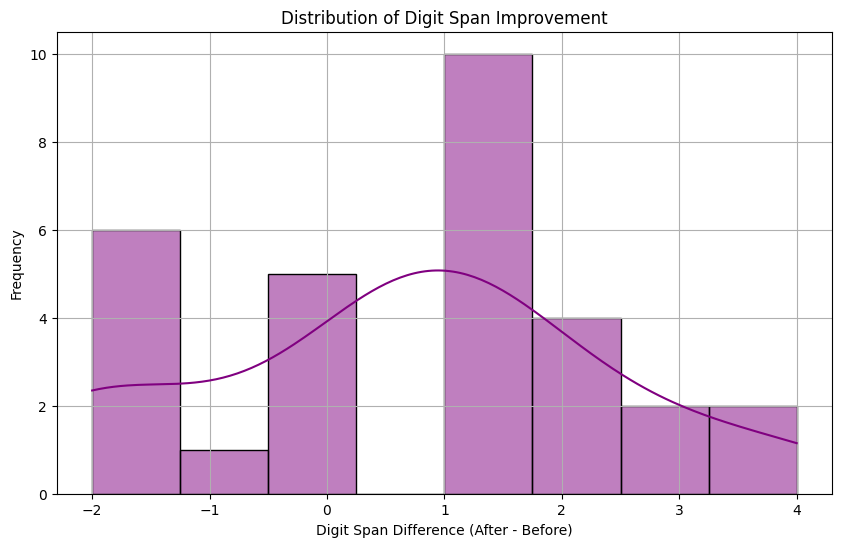

Digit Span Improvement Statistics:
Mean: 0.63
Median: 1.00
Mode: 1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/processed_digit_span_data_last - processed_digit_span_data (1) - processed_digit_span_data_last - processed_digit_span_data (1).csv")  # Change the file name if needed

# Plot histogram of Digit Span Difference
plt.figure(figsize=(10, 6))
sns.histplot(df['Digit Span Difference'], kde=True, bins=8, color='purple')
plt.title("Distribution of Digit Span Improvement")
plt.xlabel("Digit Span Difference (After - Before)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Calculate statistics
mean_diff = df['Digit Span Difference'].mean()
median_diff = df['Digit Span Difference'].median()
mode_diff = df['Digit Span Difference'].mode()[0]

print("Digit Span Improvement Statistics:")
print(f"Mean: {mean_diff:.2f}")
print(f"Median: {median_diff:.2f}")
print(f"Mode: {mode_diff}")


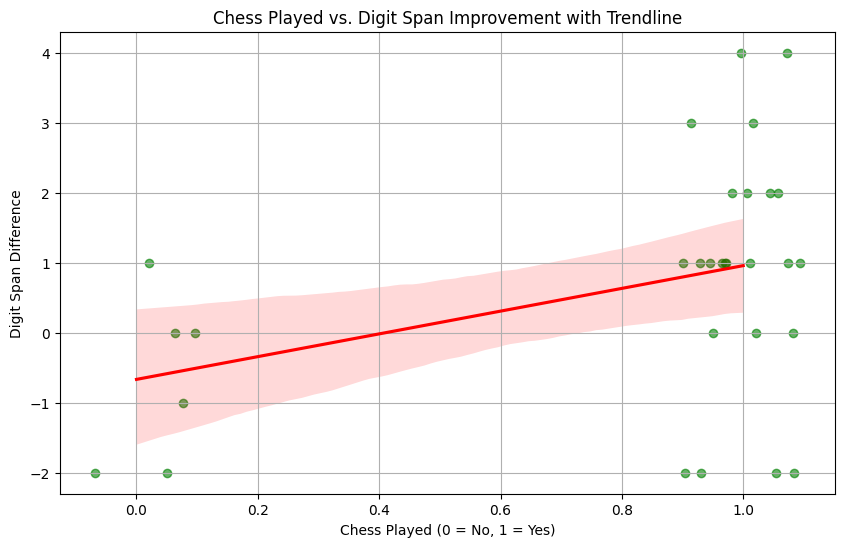

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi oku ve hazırlık (eğer zaten hazırlanmadıysa)
df = pd.read_csv("/content/drive/MyDrive/processed_digit_span_data_last - processed_digit_span_data (1) - processed_digit_span_data_last - processed_digit_span_data (1).csv")
df["Chess Played Binary"] = df["Chess Played?"].map({"Yes": 1, "No": 0})

# Grafik çizimi
plt.figure(figsize=(10, 6))
sns.regplot(
    x="Chess Played Binary",
    y="Digit Span Difference",
    data=df,
    x_jitter=0.1,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"},
    color="green"
)

plt.title("Chess Played vs. Digit Span Improvement with Trendline")
plt.xlabel("Chess Played (0 = No, 1 = Yes)")
plt.ylabel("Digit Span Difference")
plt.grid(True)
plt.show()


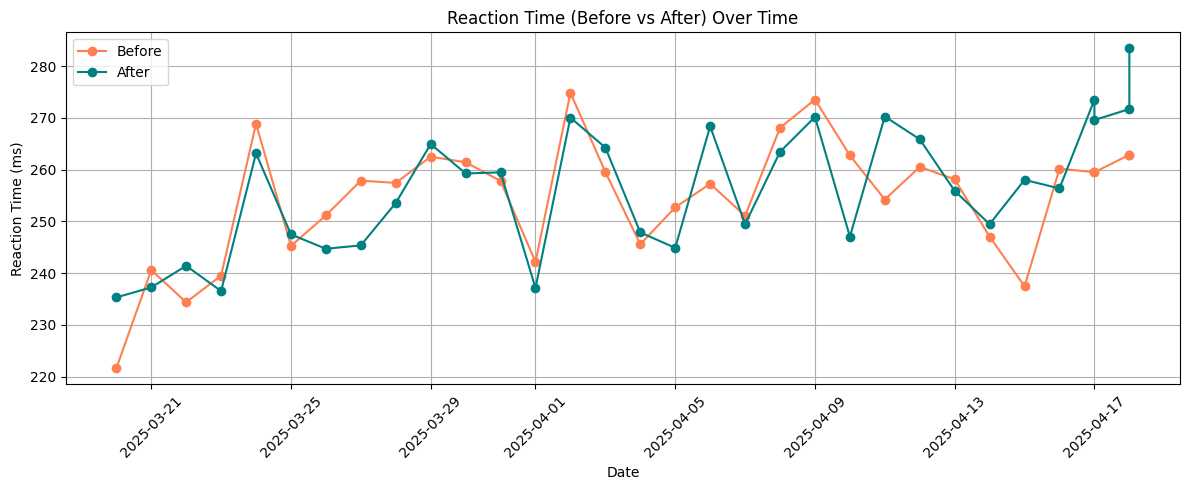

In [ ]:


# Load and clean
df = pd.read_csv("/content/drive/MyDrive/reaction_time_datas - reaction_time_datas - Sheet1 (1) (2) - reaction_time_datas - reaction_time_datas - Sheet1 (1) (2).csv")
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Reaction Time (Before)'] = df['Reaction Time (Before)'].str.replace(',', '.').astype(float)
df['Reaction Time (After)'] = df['Reaction Time (After)'].str.replace(',', '.').astype(float)
df = df.sort_values('Date')

# Plot both before and after
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Reaction Time (Before)'], marker='o', label='Before', color='coral')
plt.plot(df['Date'], df['Reaction Time (After)'], marker='o', label='After', color='teal')
plt.title("Reaction Time (Before vs After) Over Time")
plt.xlabel("Date")
plt.ylabel("Reaction Time (ms)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


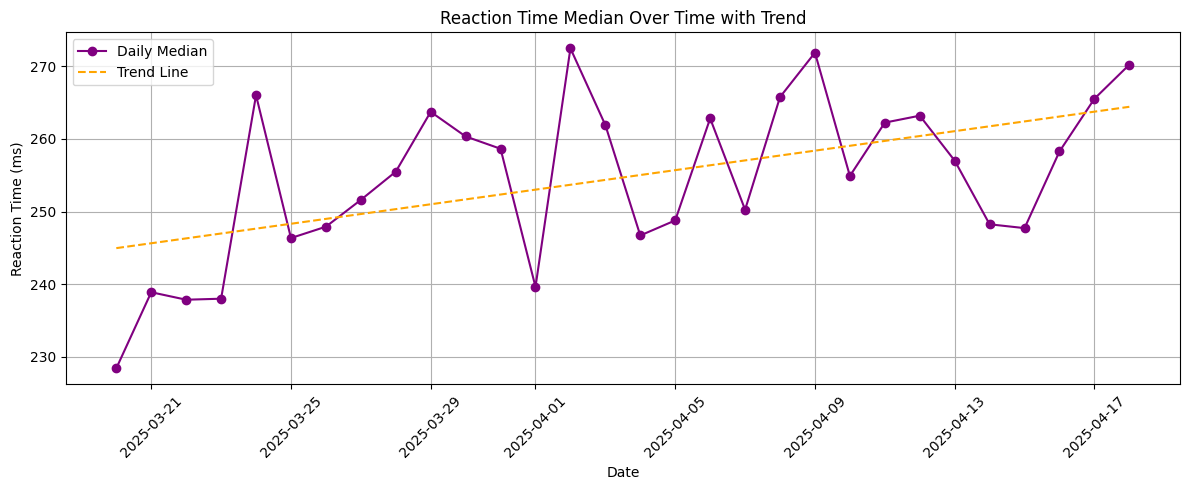

In [ ]:
#As we can see, there is an positive trend line.This might be caused by the effect o chess during 30 days period.We started at lowest point and finished at the highest point.
#Analyzing day by day does not show us enough informationsa about the results because,
#there is small differences in a day.But, looking the whole period tell us different story.


# Load & clean dataset
df = pd.read_csv("/content/drive/MyDrive/reaction_time_datas - reaction_time_datas - Sheet1 (1) (2) - reaction_time_datas - reaction_time_datas - Sheet1 (1) (2).csv")
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Reaction Time (Before)'] = df['Reaction Time (Before)'].str.replace(',', '.').astype(float)
df['Reaction Time (After)'] = df['Reaction Time (After)'].str.replace(',', '.').astype(float)

# Compute median and average per day
df['Reaction Time Median'] = df[['Reaction Time (Before)', 'Reaction Time (After)']].median(axis=1)
daily_median = df.groupby('Date')['Reaction Time Median'].mean().reset_index()

# Prepare trend line
x = np.arange(len(daily_median))
y = daily_median['Reaction Time Median'].values
z = np.polyfit(x, y, deg=1)  # linear fit
trend = np.poly1d(z)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(daily_median['Date'], y, marker='o', color='purple', label='Daily Median')
plt.plot(daily_median['Date'], trend(x), linestyle='--', color='orange', label='Trend Line')
plt.title("Reaction Time Median Over Time with Trend")
plt.xlabel("Date")
plt.ylabel("Reaction Time (ms)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-79-93990dbebc5f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Test Phase', y='Verbal Memory Score', palette='pastel', width=0.5)


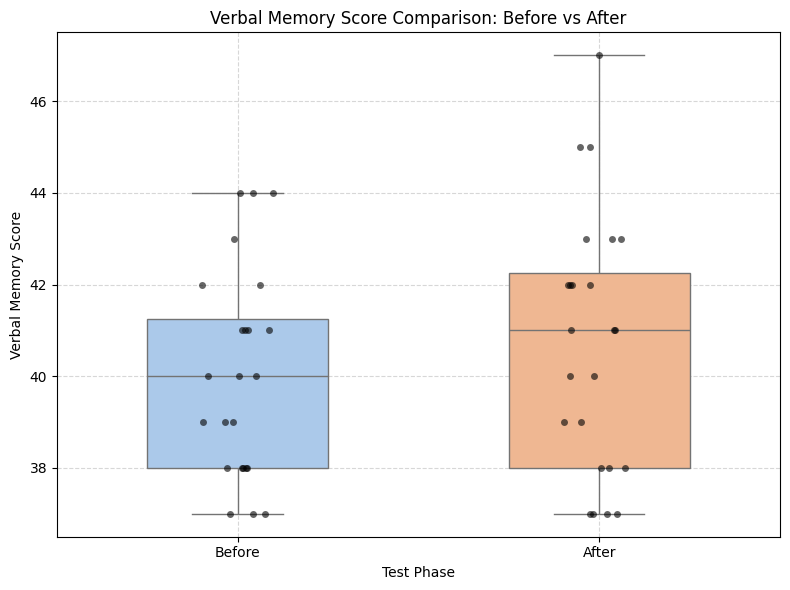

In [ ]:

# Veriyi yükle ve temizle
verbal_df = pd.read_csv("/content/drive/MyDrive/verbal_test_data (2).csv")
verbal_df.columns = verbal_df.columns.str.strip()
verbal_df['Date'] = pd.to_datetime(verbal_df['Date'], dayfirst=True)

# Sadece 'Before' ve 'After' olanları al
filtered_df = verbal_df[verbal_df['Test Phase'].isin(['Before', 'After'])]

# Seaborn Boxplot + stripplot (dağılımı daha net görmek için)
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_df, x='Test Phase', y='Verbal Memory Score', palette='pastel', width=0.5)
sns.stripplot(data=filtered_df, x='Test Phase', y='Verbal Memory Score',
              color='black', size=5, jitter=True, alpha=0.6)

plt.title("Verbal Memory Score Comparison: Before vs After")
plt.xlabel("Test Phase")
plt.ylabel("Verbal Memory Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



<ipython-input-82-d6c4a16352cd>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pivot_df, x='Date_Label', y='Improvement', palette='RdYlGn', edgecolor='black')


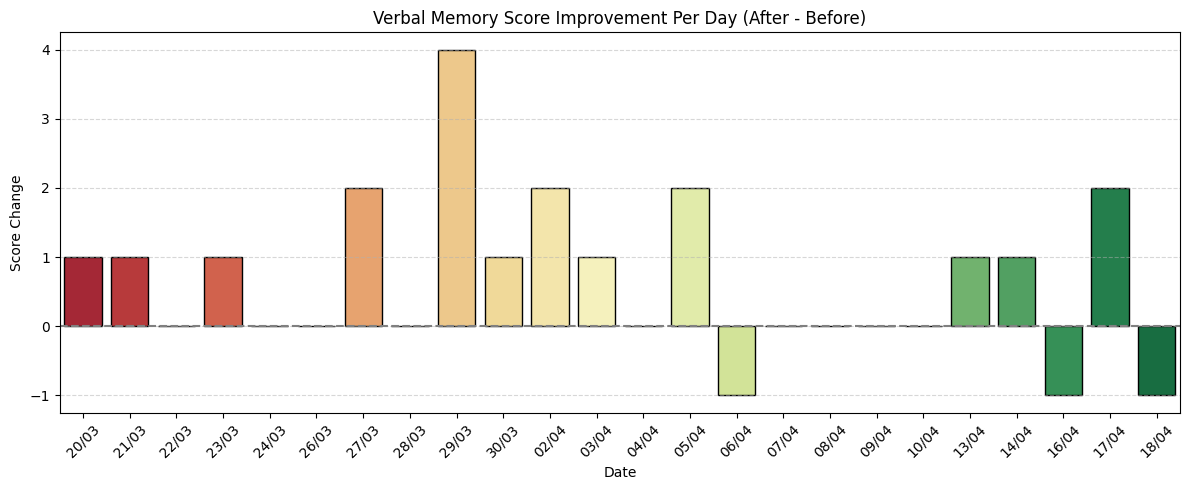

In [ ]:
# Load & prepare
df = pd.read_csv("/content/drive/MyDrive/verbal_test_data (2).csv")
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
filtered = df[df['Test Phase'].isin(['Before', 'After'])].copy()
pivot_df = filtered.pivot(index='Date', columns='Test Phase', values='Verbal Memory Score').dropna().reset_index()
pivot_df['Improvement'] = pivot_df['After'] - pivot_df['Before']

# Format dates as "dd/mm"
pivot_df['Date_Label'] = pivot_df['Date'].dt.strftime('%d/%m')

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=pivot_df, x='Date_Label', y='Improvement', palette='RdYlGn', edgecolor='black')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Verbal Memory Score Improvement Per Day (After - Before)")
plt.xlabel("Date")
plt.ylabel("Score Change")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


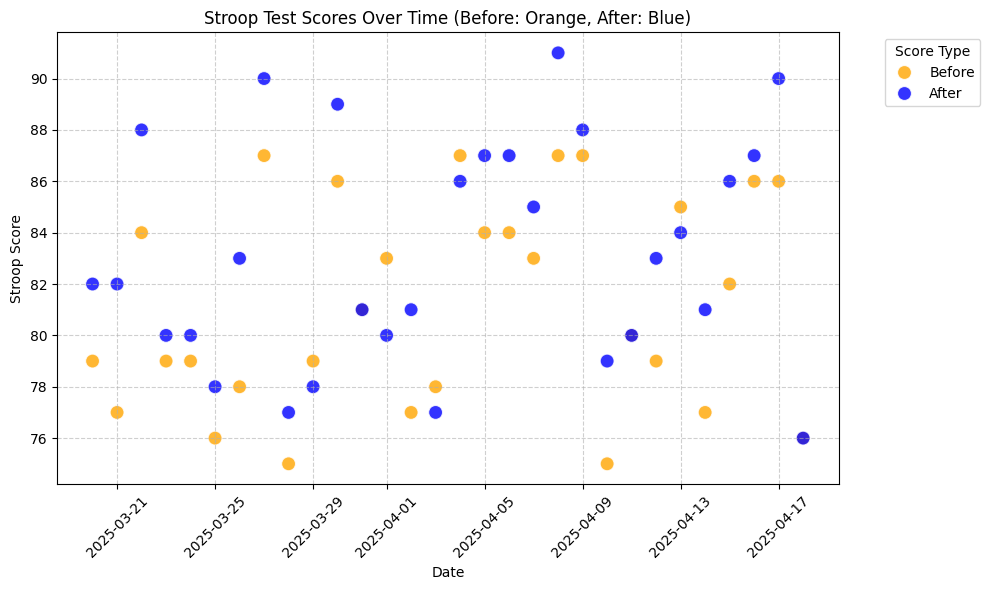

In [ ]:

# Veriyi yükle ve temizle
stroop_df = pd.read_csv("/content/drive/MyDrive/Stroop_score_datas - Sheet1 (3).csv")
stroop_df.columns = stroop_df.columns.str.strip()
stroop_df_clean = stroop_df.iloc[2:].copy()
stroop_df_clean.columns = ['Date', 'Chess Played?', 'Stroop Score (Before)', 'Stroop Score (After)']
stroop_df_clean['Date'] = pd.to_datetime(stroop_df_clean['Date'], dayfirst=True)
stroop_df_clean['Stroop Score (Before)'] = stroop_df_clean['Stroop Score (Before)'].astype(float)
stroop_df_clean['Stroop Score (After)'] = stroop_df_clean['Stroop Score (After)'].astype(float)

# Yeni dataframe: Before ve After'ı tek sütuna getir
before_df = stroop_df_clean[['Date', 'Stroop Score (Before)']].copy()
before_df['Score Type'] = 'Before'
before_df.rename(columns={'Stroop Score (Before)': 'Score'}, inplace=True)

after_df = stroop_df_clean[['Date', 'Stroop Score (After)']].copy()
after_df['Score Type'] = 'After'
after_df.rename(columns={'Stroop Score (After)': 'Score'}, inplace=True)

# Birleştir
plot_df = pd.concat([before_df, after_df])

# Çizim
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_df,
    x='Date',
    y='Score',
    hue='Score Type',
    palette={'Before': 'orange', 'After': 'blue'},
    s=100,
    alpha=0.8
)
plt.title("Stroop Test Scores Over Time (Before: Orange, After: Blue)")
plt.xlabel("Date")
plt.ylabel("Stroop Score")
plt.xticks(rotation=45)
plt.legend(title="Score Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


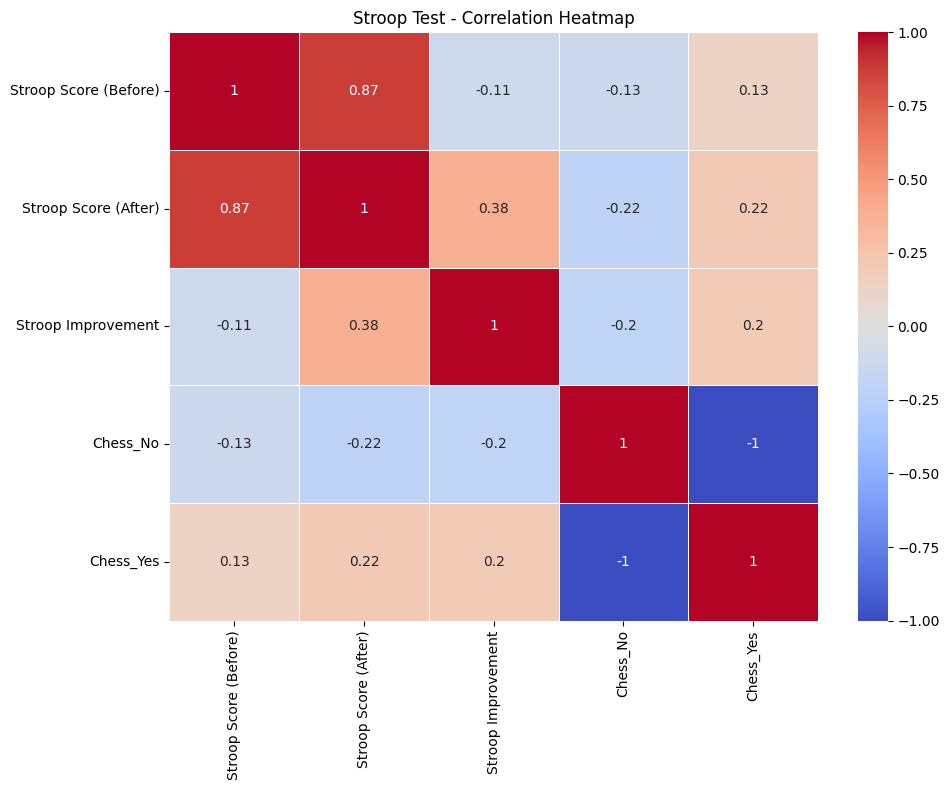

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataseti yükle
stroop_df = pd.read_csv("/content/drive/MyDrive/Stroop_score_datas - Sheet1 (3).csv")
stroop_df.columns = stroop_df.columns.str.strip()

# İlk 2 satır header, temizle
stroop_df_clean = stroop_df.iloc[2:].copy()
stroop_df_clean.columns = ['Date', 'Chess Played?', 'Stroop Score (Before)', 'Stroop Score (After)']

# Temizlik
stroop_df_clean['Date'] = pd.to_datetime(stroop_df_clean['Date'], dayfirst=True)
stroop_df_clean['Stroop Score (Before)'] = stroop_df_clean['Stroop Score (Before)'].astype(float)
stroop_df_clean['Stroop Score (After)'] = stroop_df_clean['Stroop Score (After)'].astype(float)

# Improvement (After - Before) hesapla
stroop_df_clean['Stroop Improvement'] = stroop_df_clean['Stroop Score (After)'] - stroop_df_clean['Stroop Score (Before)']

# Chess Played? One-hot encode
chess_encoded = pd.get_dummies(stroop_df_clean['Chess Played?'], prefix='Chess')

# Encode'ları ana dataframe'e ekle
stroop_df_clean = pd.concat([stroop_df_clean, chess_encoded], axis=1)

# Correlation matrisi için kullanılacak sütunlar
correlation_features = ['Stroop Score (Before)', 'Stroop Score (After)', 'Stroop Improvement'] + list(chess_encoded.columns)

# Correlation hesapla
correlation = stroop_df_clean[correlation_features].corr()

# Heatmap çizimi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Stroop Test - Correlation Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
import statsmodels.api as sm

reaction_df = pd.read_csv('/content/drive/MyDrive/reaction_time_datas - reaction_time_datas - Sheet1 (1) (2) - reaction_time_datas - reaction_time_datas - Sheet1 (1) (2).csv')
digit_df = pd.read_csv('/content/drive/MyDrive/processed_digit_span_data_last - processed_digit_span_data (1) - processed_digit_span_data_last - processed_digit_span_data (1).csv')
stroop_df = pd.read_csv('/content/drive/MyDrive/Stroop_score_datas - Sheet1 (3).csv')
verbal_df = pd.read_csv('/content/drive/MyDrive/verbal_test_data (2).csv')


In [ ]:
# Prepare Reaction Time
reaction_df.columns = reaction_df.columns.str.strip()
reaction_df['Date'] = pd.to_datetime(reaction_df['Date'], dayfirst=True)
reaction_df['Reaction Time (Before)'] = reaction_df['Reaction Time (Before)'].str.replace(',', '.').astype(float)
reaction_df['Reaction Time (After)'] = reaction_df['Reaction Time (After)'].str.replace(',', '.').astype(float)
reaction_df['Reaction Improvement'] = reaction_df['Reaction Time (Before)'] - reaction_df['Reaction Time (After)']

In [ ]:
# Prepare Digit Span
digit_df['Date'] = pd.to_datetime(digit_df['Date'])
digit_df['Digit Span Improvement'] = digit_df['Digit Span (After)'] - digit_df['Digit Span (Before)']

In [ ]:
# Prepare Stroop
stroop_df_clean = stroop_df.iloc[2:].copy()
stroop_df_clean.columns = ['Date', 'Chess Played?', 'Stroop Score (Before)', 'Stroop Score (After)']
stroop_df_clean['Date'] = pd.to_datetime(stroop_df_clean['Date'], dayfirst=True)
stroop_df_clean['Stroop Score (Before)'] = stroop_df_clean['Stroop Score (Before)'].astype(float)
stroop_df_clean['Stroop Score (After)'] = stroop_df_clean['Stroop Score (After)'].astype(float)
stroop_df_clean['Stroop Improvement'] = stroop_df_clean['Stroop Score (After)'] - stroop_df_clean['Stroop Score (Before)']

In [ ]:
# Prepare Verbal Memory
verbal_df['Date'] = pd.to_datetime(verbal_df['Date'], dayfirst=True)
verbal_pivot = verbal_df.pivot(index=['Date', 'Chess Played?'], columns='Test Phase', values='Verbal Memory Score').reset_index()
verbal_pivot['Verbal Improvement'] = verbal_pivot['After'] - verbal_pivot['Before']

In [ ]:
# Reaction Time
reaction_t, reaction_p = ttest_rel(reaction_df['Reaction Time (Before)'], reaction_df['Reaction Time (After)'], nan_policy='omit')
# Digit Span
digit_t, digit_p = ttest_rel(digit_df['Digit Span (Before)'], digit_df['Digit Span (After)'], nan_policy='omit')
# Stroop
stroop_t, stroop_p = ttest_rel(stroop_df_clean['Stroop Score (Before)'], stroop_df_clean['Stroop Score (After)'], nan_policy='omit')
# Verbal Memory
verbal_t, verbal_p = ttest_rel(verbal_pivot['Before'], verbal_pivot['After'], nan_policy='omit')

print(f'Reaction Time Paired t-test p-value: {reaction_p:.4f}')
print(f'Digit Span Paired t-test p-value: {digit_p:.4f}')
print(f'Stroop Test Paired t-test p-value: {stroop_p:.4f}')
print(f'Verbal Memory Paired t-test p-value: {verbal_p:.4f}')

Reaction Time Paired t-test p-value: 0.2706
Digit Span Paired t-test p-value: 0.0977
Stroop Test Paired t-test p-value: 0.0000
Verbal Memory Paired t-test p-value: 0.0102


In [ ]:
# Add Chess Played as binary
reaction_df['Chess_Yes'] = reaction_df['Chess Played?'].apply(lambda x: 1 if x == 'Yes' else 0)
digit_df['Chess_Yes'] = digit_df['Chess Played?'].apply(lambda x: 1 if x == 'Yes' else 0)
stroop_df_clean['Chess_Yes'] = stroop_df_clean['Chess Played?'].apply(lambda x: 1 if x == 'Yes' else 0)
verbal_pivot['Chess_Yes'] = verbal_pivot['Chess Played?'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
import statsmodels.api as sm

# Reaction Time
X_reaction = sm.add_constant(reaction_df['Chess_Yes'])
model_reaction = sm.OLS(reaction_df['Reaction Improvement'], X_reaction).fit()

# Digit Span
X_digit = sm.add_constant(digit_df['Chess_Yes'])
model_digit = sm.OLS(digit_df['Digit Span Improvement'], X_digit).fit()

# Stroop
X_stroop = sm.add_constant(stroop_df_clean['Chess_Yes'])
model_stroop = sm.OLS(stroop_df_clean['Stroop Improvement'], X_stroop).fit()

# Verbal Memory
X_verbal = sm.add_constant(verbal_pivot['Chess_Yes'])
model_verbal = sm.OLS(verbal_pivot['Verbal Improvement'], X_verbal).fit()

# Temiz ve basit çıktı almak
def simple_regression_output(model, model_name):
    try:
        p_value = model.pvalues['Chess_Yes']
        coef = model.params['Chess_Yes']

        print(f"🔹 {model_name}")
        if pd.isna(p_value) or pd.isna(coef):
            print(f"    🚫 Result: Regression could not be performed (possible missing or constant data).\n")
        else:
            print(f"    ➔ Coefficient (Chess Played): {coef:.4f}")
            print(f"    ➔ p-value: {p_value:.4f}")
            if p_value < 0.05:
                print(f"     Result: Statistically significant at 0.05 level.\n")
            else:
                print(f"     Result: Not statistically significant at 0.05 level.\n")
    except Exception as e:
        print(f"     Error analyzing {model_name}: {str(e)}\n")

# Kullanım:
simple_regression_output(model_reaction, "Reaction Time Improvement")
simple_regression_output(model_digit, "Digit Span Improvement")
simple_regression_output(model_stroop, "Stroop Improvement")
simple_regression_output(model_verbal, "Verbal Memory Improvement")


🔹 Reaction Time Improvement
    ➔ Coefficient (Chess Played): 6.1747
    ➔ p-value: 0.1308
     Result: Not statistically significant at 0.05 level.

🔹 Digit Span Improvement
    ➔ Coefficient (Chess Played): 1.9583
    ➔ p-value: 0.0151
     Result: Statistically significant at 0.05 level.

🔹 Stroop Improvement
    ➔ Coefficient (Chess Played): 1.0417
    ➔ p-value: 0.2927
     Result: Not statistically significant at 0.05 level.

🔹 Verbal Memory Improvement
    🚫 Result: Regression could not be performed (possible missing or constant data).



['User_ID', 'Age', 'Gender', 'Reaction_Time', 'Memory_Test_Score', 'Cognitive_Score', 'AI_Predicted_Score']
  User_ID  Age  Gender  Reaction_Time  Memory_Test_Score  Cognitive_Score  \
0      U1   57  Female         583.33                 65            36.71   
1      U2   39  Female         368.24                 58            54.35   
2      U3   26    Male         445.21                 49            32.57   
3      U4   32    Male         286.33                 94            70.15   
4      U5   50    Male         237.65                 62            87.54   

   AI_Predicted_Score  
0               39.77  
1               57.68  
2               29.54  
3               74.59  
4               91.78  
Linear Regression → R²: 0.986 | MSE: 7.54
Random Forest     → R²: 0.984 | MSE: 8.19
Age: 0.003
Reaction_Time: 0.005
Memory_Test_Score: 0.003
AI_Predicted_Score: 0.989
Gender_Male: 0.000
Gender_Other: 0.000


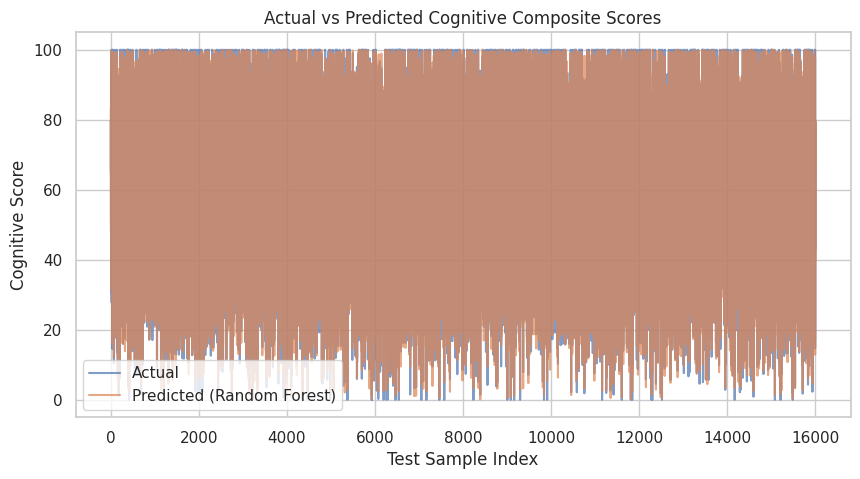

In [60]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set visual style
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/cleaned_kaggle_dataset.csv")
print(df.columns.tolist()) # To print the list of column names

# Clean column names (remove trailing spaces if any)
df.columns = df.columns.str.strip()

# Inspect the dataset (optional)
print(df.head())

# Select features and target
# Removed 'User_ID' as it is a string identifier and not suitable for direct regression
features = ['Age', 'Gender', 'Reaction_Time', 'Memory_Test_Score', 'AI_Predicted_Score']
target = 'Cognitive_Score'

X = df[features]
y = df[target]

# Handle categorical feature 'Gender' by one-hot encoding
X = pd.get_dummies(X, columns=['Gender'], drop_first=True) # Drop_first avoids multicollinearity

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)

# Evaluate models
lr_mse = mean_squared_error(y_test, lr_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

lr_r2 = r2_score(y_test, lr_preds)
rf_r2 = r2_score(y_test, rf_preds)

# Print performance results
print(f"Linear Regression → R²: {lr_r2:.3f} | MSE: {lr_mse:.2f}")
print(f"Random Forest     → R²: {rf_r2:.3f} | MSE: {rf_mse:.2f}")

# Optional: Feature importance from Random Forest
# Update features list to reflect one-hot encoding for importance calculation
updated_features = X_train.columns.tolist()
importances = rf.feature_importances_
for feat, score in zip(updated_features, importances):
    print(f"{feat}: {score:.3f}")


# Optional: Plot predicted vs actual
plt.figure(figsize=(10, 5))
# Ensure y_test and predictions have compatible indices/ordering if needed, but typically they are aligned after train_test_split
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(rf_preds, label="Predicted (Random Forest)", alpha=0.7)
plt.title("Actual vs Predicted Cognitive Composite Scores")
plt.xlabel("Test Sample Index")
plt.ylabel("Cognitive Score")
plt.legend()
plt.show()

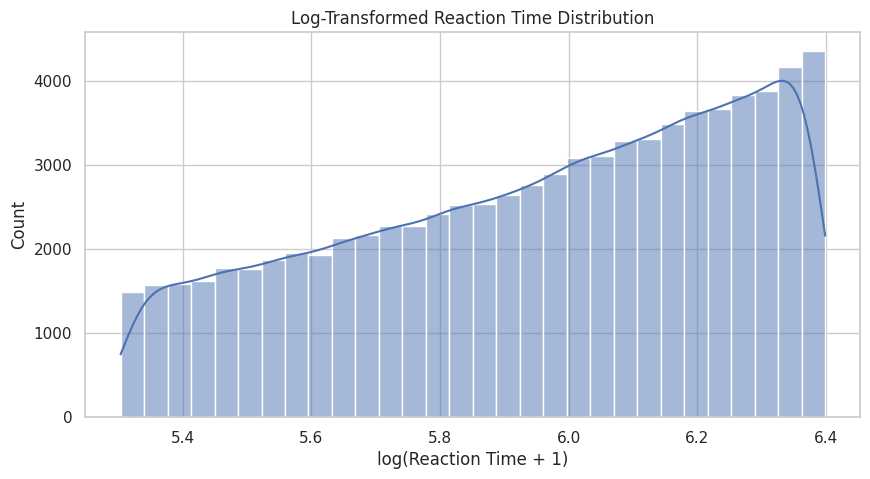

In [61]:
import numpy as np

# Log dönüşümü uygula (0 değerlerinden kaçınmak için 1 eklenir)
df['Reaction_Time_log'] = np.log1p(df['Reaction_Time'])

plt.figure(figsize=(10, 5))
sns.histplot(df['Reaction_Time_log'], bins=30, kde=True)
plt.title("Log-Transformed Reaction Time Distribution")
plt.xlabel("log(Reaction Time + 1)")
plt.ylabel("Count")
plt.show()


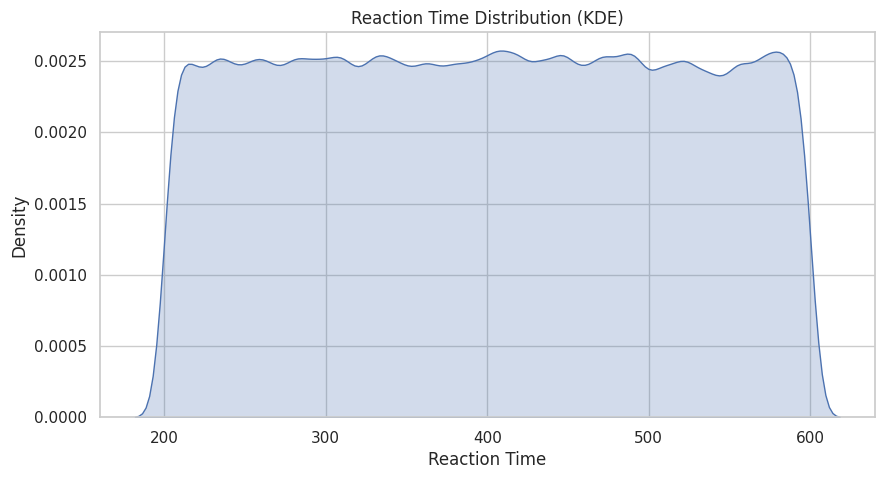

In [62]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Reaction_Time'], fill=True, bw_adjust=0.5)
plt.title("Reaction Time Distribution (KDE)")
plt.xlabel("Reaction Time")
plt.ylabel("Density")
plt.show()


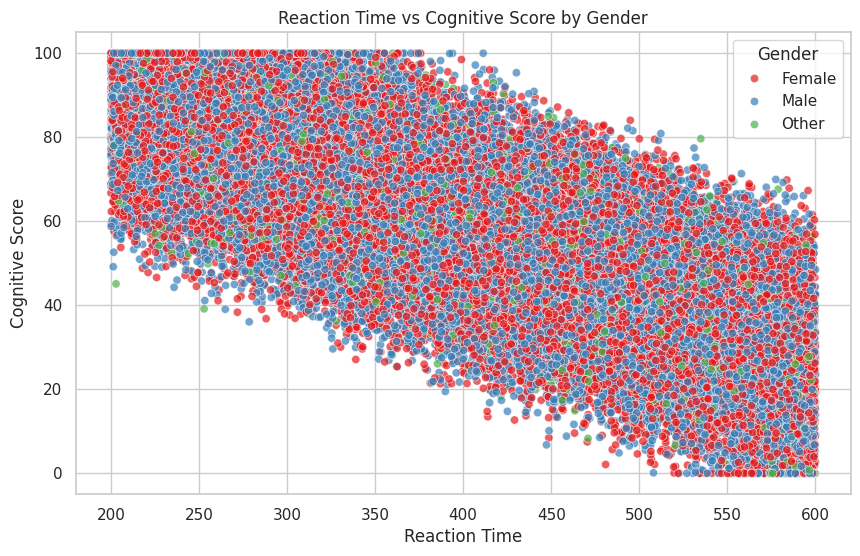

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='Reaction_Time', y='Cognitive_Score',
    hue='Gender', palette='Set1', alpha=0.7
)
plt.title("Reaction Time vs Cognitive Score by Gender")
plt.xlabel("Reaction Time")
plt.ylabel("Cognitive Score")
plt.show()


In [64]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         4

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6

Regression MSE: 6.697211449676826


<ipython-input-65-57b8632d01f5>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Chess_Played', y='Stroop_Improvement', data=df, palette=sns.color_palette("Set2"))
<ipython-input-65-57b8632d01f5>:45: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(x='Chess_Played', y='Stroop_Improvement', data=df, palette=sns.color_palette("Set2"))


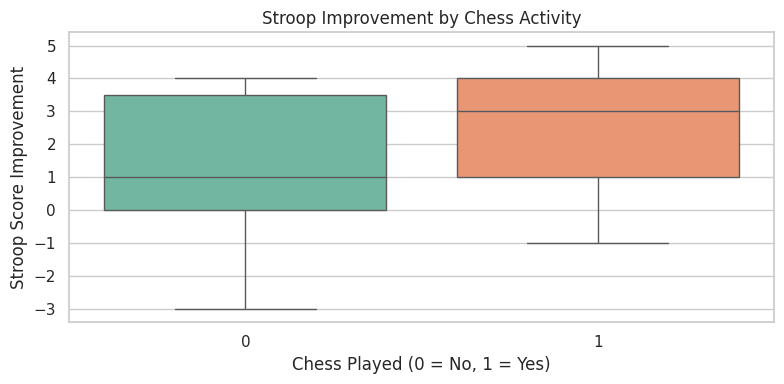

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import train_test_split

# Load and clean the data
df = pd.read_csv("/content/drive/MyDrive/Stroop_score_datas - Sheet1 (3).csv")
df.columns = df.iloc[1]
df = df[2:].reset_index(drop=True)
df.columns = ['Date', 'Chess_Played', 'Stroop_Before', 'Stroop_After']

df['Stroop_Before'] = pd.to_numeric(df['Stroop_Before'], errors='coerce')
df['Stroop_After'] = pd.to_numeric(df['Stroop_After'], errors='coerce')
df['Chess_Played'] = df['Chess_Played'].map({'Yes': 1, 'No': 0})
df['Improved'] = (df['Stroop_After'] > df['Stroop_Before']).astype(int)
df['Stroop_Improvement'] = df['Stroop_After'] - df['Stroop_Before']

# Classification
X_class = df[['Chess_Played']]
y_class = df['Improved']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train_c, y_train_c)
y_pred_c = clf.predict(X_test_c)

print("Classification Report:")
print(classification_report(y_test_c, y_pred_c, zero_division=0))

# Regression
X_reg = df[['Chess_Played']]
y_reg = df['Stroop_Improvement']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

regr = LinearRegression()
regr.fit(X_train_r, y_train_r)
y_pred_r = regr.predict(X_test_r)

print("Regression MSE:", mean_squared_error(y_test_r, y_pred_r))

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x='Chess_Played', y='Stroop_Improvement', data=df, palette=sns.color_palette("Set2"))
plt.title("Stroop Improvement by Chess Activity")
plt.xlabel("Chess Played (0 = No, 1 = Yes)")
plt.ylabel("Stroop Score Improvement")
plt.tight_layout()
plt.show()



Mean Squared Error: 112.52924826889917
R2 Score: -0.23390851349818265


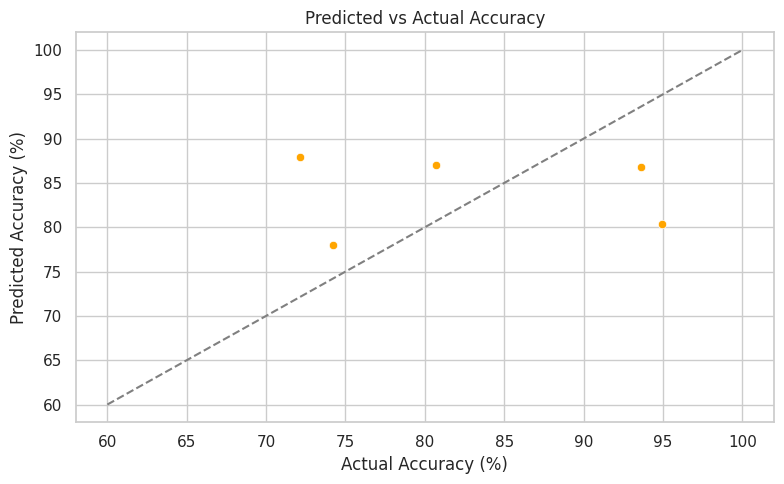

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/chess_datas1 - Sheet1.csv")

# 🔧 Fix potential column name formatting issues
df.columns = df.columns.str.strip()

# Drop rows with missing key chess data
df = df.dropna(subset=[
    'Game Type', 'Play Time (min)', 'Accuracy (%)', 'Blunders', 'Mistakes', 'Rating'
])

# Convert Accuracy to float (from "94,52" format to 94.52)
df['Accuracy (%)'] = df['Accuracy (%)'].str.replace(',', '.', regex=False)
df['Accuracy (%)'] = pd.to_numeric(df['Accuracy (%)'], errors='coerce')

# Encode Game Type as numeric
df['Game Type'] = df['Game Type'].astype('category')
df['Game_Type_Code'] = df['Game Type'].cat.codes

# Add new features: Blunder and Mistake rates
df['Blunder_Rate'] = df['Blunders'] / df['Play Time (min)']
df['Mistake_Rate'] = df['Mistakes'] / df['Play Time (min)']

# Define features and target
features = ['Game_Type_Code', 'Play Time (min)', 'Blunders', 'Mistakes', 'Rating', 'Blunder_Rate', 'Mistake_Rate']
target = 'Accuracy (%)'

X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Plot predicted vs actual
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color="orange")
plt.plot([60, 100], [60, 100], '--', color='gray')
plt.xlabel("Actual Accuracy (%)")
plt.ylabel("Predicted Accuracy (%)")
plt.title("Predicted vs Actual Accuracy")
plt.tight_layout()
plt.show()


In [67]:
df = pd.read_csv("/content/drive/MyDrive/lazımolanşey.csv")

✅ Accuracy: 0.2857142857142857

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.29      1.00      0.44         2

    accuracy                           0.29         7
   macro avg       0.14      0.50      0.22         7
weighted avg       0.08      0.29      0.13         7



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


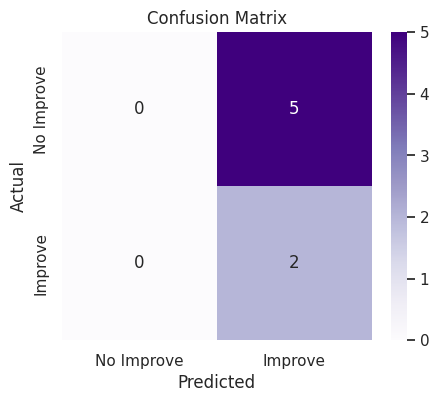

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
df = pd.read_csv("/content/drive/MyDrive/lazımolanşey.csv")

# Step 2: Drop rows with missing values
df.dropna(inplace=True)

# Step 3: Create binary target column for improvement (1 if faster reaction time after chess)
df['Did_Improve'] = (df['Reaction Time (After)'] < df['Reaction Time (Before)']).astype(int)

# Step 4: Feature encoding
df['Chess_Played'] = df['Chess Played?'].map({'Yes': 1, 'No': 0})

# Step 5: Define features and label
X = df[['Chess_Played']]
y = df['Did_Improve']

# Step 6: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Improve', 'Improve'],
            yticklabels=['No Improve', 'Improve'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.2857142857142857

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.29      1.00      0.44         2

    accuracy                           0.29         7
   macro avg       0.14      0.50      0.22         7
weighted avg       0.08      0.29      0.13         7



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


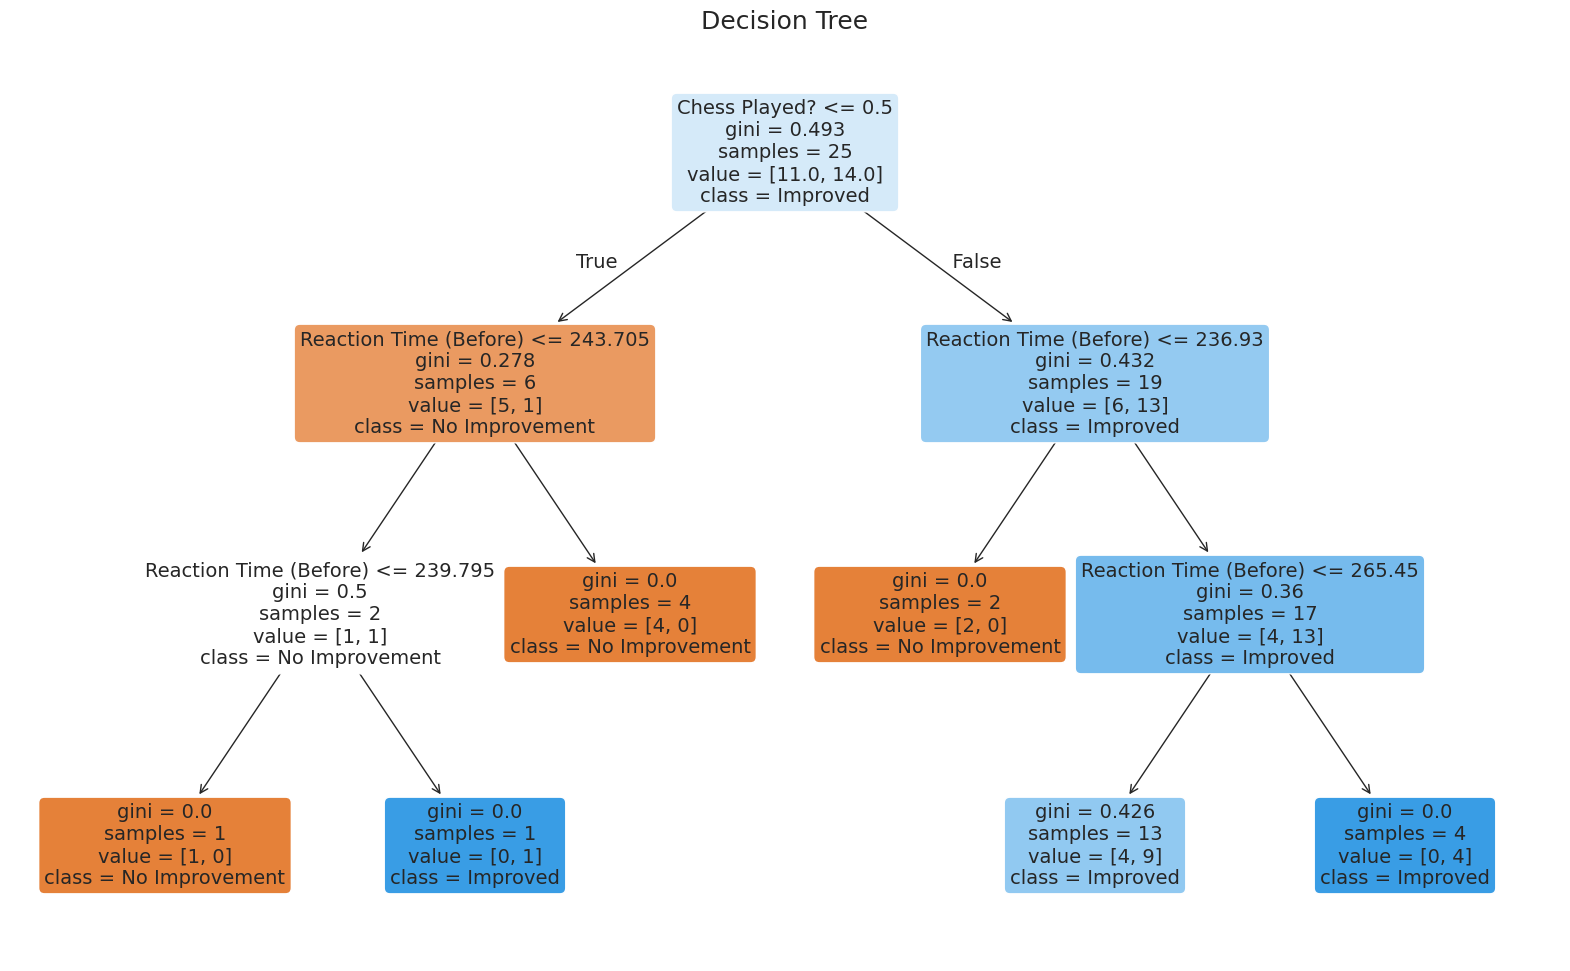

Decision Tree Explanation:

If Chess Played? ≤ 0.5:
  If Reaction Time (Before) ≤ 243.7:
    If Reaction Time (Before) ≤ 239.8:
      → Total 1 days:
   0 days improved,
   1 days not improved
   Prediction: No Improvement
    ELSE (i.e., Reaction Time (Before) > 239.8):
      → Total 1 days:
   1 days improved,
   0 days not improved
   Prediction: Improved
  ELSE (i.e., Reaction Time (Before) > 243.7):
    → Total 4 days:
   0 days improved,
   1 days not improved
   Prediction: No Improvement
ELSE (i.e., Chess Played? > 0.5):
  If Reaction Time (Before) ≤ 236.9:
    → Total 2 days:
   0 days improved,
   1 days not improved
   Prediction: No Improvement
  ELSE (i.e., Reaction Time (Before) > 236.9):
    If Reaction Time (Before) ≤ 265.4:
      → Total 13 days:
   0 days improved,
   0 days not improved
   Prediction: No Improvement
    ELSE (i.e., Reaction Time (Before) > 265.4):
      → Total 4 days:
   1 days improved,
   0 days not improved
   Prediction: Improved



In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv('/content/drive/MyDrive/2lazımolanşey.csv')

# 2. Replace commas with dots and convert to float
df['Reaction Time (Before)'] = df['Reaction Time (Before)'].str.replace(',', '.').astype(float)
df['Reaction Time (After)'] = df['Reaction Time (After)'].str.replace(',', '.').astype(float)

# 3. Remove missing values
df.dropna(inplace=True)

# 4. Create the target column: whether there's improvement
df['Did_Improve'] = (df['Reaction Time (After)'] < df['Reaction Time (Before)']).astype(int)

# 5. Convert 'Chess Played?' column to 1-0
df['Chess_Played'] = df['Chess Played?'].map({'Yes': 1, 'No': 0})

# 6. Define features and target
X = df[['Chess_Played', 'Reaction Time (Before)']]
y = df['Did_Improve']

# 7. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train the decision tree
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# 9. Predict and evaluate
y_pred = tree_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 10. Plot a large and readable decision tree
plt.figure(figsize=(20, 12))
plot_tree(tree_model,
          feature_names=['Chess Played?', 'Reaction Time (Before)'],
          class_names=['No Improvement', 'Improved'],
          filled=True,
          rounded=True,
          fontsize=14)
plt.title("Decision Tree", fontsize=18)
plt.show()

# 11. Print interpretive explanation of the decision tree
from sklearn.tree import _tree

def custom_text_representation(decision_tree, feature_names, class_names):
    tree_ = decision_tree.tree_

    def recurse(node, depth=0):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_names[tree_.feature[node]]
            threshold = tree_.threshold[node]
            return f"{indent}If {name} ≤ {threshold:.1f}:\n" + \
                   recurse(tree_.children_left[node], depth + 1) + \
                   f"{indent}ELSE (i.e., {name} > {threshold:.1f}):\n" + \
                   recurse(tree_.children_right[node], depth + 1)
        else:
            total = int(tree_.n_node_samples[node])
            yes = int(tree_.value[node][0][1])
            no = int(tree_.value[node][0][0])
            final = class_names[1] if yes > no else class_names[0]
            return f"{indent}→ Total {total} days:\n   {yes} days improved,\n   {no} days not improved\n   Prediction: {final}\n"

    return recurse(0)

explanation = custom_text_representation(
    tree_model,
    feature_names=['Chess Played?', 'Reaction Time (Before)'],
    class_names=['No Improvement', 'Improved']
)

print("Decision Tree Explanation:\n")
print(explanation)


🔍 Random Forest Classifier
Accuracy: 0.625
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.50      1.00      0.67         3

    accuracy                           0.62         8
   macro avg       0.75      0.70      0.62         8
weighted avg       0.81      0.62      0.61         8


🔍 Logistic Regression
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.40      0.67      0.50         3

    accuracy                           0.50         8
   macro avg       0.53      0.53      0.50         8
weighted avg       0.57      0.50      0.50         8


🔍 Linear Regression (Score Difference Prediction)
R² Score: 0.9935347975085222
Mean Absolute Error: 0.056767287905430217


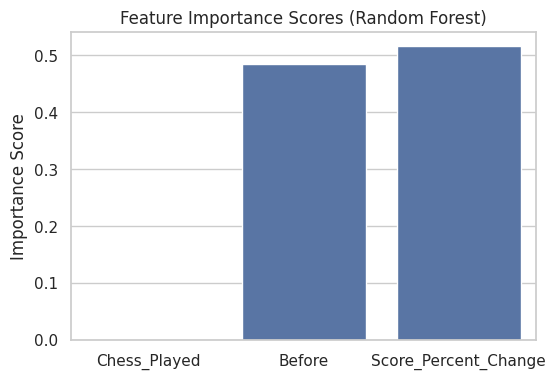

📋 Feature Contributions (Random Forest):
- Score_Percent_Change: contributes to the model decision with an importance level of 0.52.
- Before: contributes to the model decision with an importance level of 0.48.
- Chess_Played: contributes to the model decision with an importance level of 0.00.


In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('/content/drive/MyDrive/3banalazımolanşey.csv')

# 2. Clean column names
df.columns = df.columns.str.strip().str.replace('(', '').str.replace(')', '').str.replace(' ', '_')

# 3. Convert numeric values from string to float
df['Verbal_Memory_Score'] = df['Verbal_Memory_Score'].astype(str).str.replace(',', '.').astype(float)

# 4. Pivot: Align Before and After scores in the same row
pivot_df = df.pivot(index='Date', columns='Test_Phase', values='Verbal_Memory_Score').reset_index()

# 5. Add Chess Played information
chess_played = df[df['Test_Phase'] == 'Before'][['Date', 'Chess_Played?']].reset_index(drop=True)
pivot_df = pivot_df.merge(chess_played, on='Date')
pivot_df['Chess_Played'] = pivot_df['Chess_Played?'].map({'Yes': 1, 'No': 0})

# 6. Create target and derived features
pivot_df['Did_Improve'] = (pivot_df['After'] > pivot_df['Before']).astype(int)
pivot_df['Score_Diff'] = pivot_df['After'] - pivot_df['Before']
pivot_df['Score_Percent_Change'] = (pivot_df['Score_Diff'] / pivot_df['Before']).round(3)

# 7. Feature selection
features = ['Chess_Played', 'Before', 'Score_Percent_Change']
X = pivot_df[features]
y_class = pivot_df['Did_Improve']
y_reg = pivot_df['Score_Diff']

# 8. Train-test split
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=42)

# 9.  Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced', random_state=42)
rfc.fit(X_train, y_train_class)
y_pred_rfc = rfc.predict(X_test)

print("🔍 Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test_class, y_pred_rfc))
print(classification_report(y_test_class, y_pred_rfc))

# 10.  Logistic Regression
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train, y_train_class)
y_pred_logreg = logreg.predict(X_test)

print("\n🔍 Logistic Regression")
print("Accuracy:", accuracy_score(y_test_class, y_pred_logreg))
print(classification_report(y_test_class, y_pred_logreg))

# 11.  Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train_reg)
y_pred_linreg = linreg.predict(X_test)

print("\n🔍 Linear Regression (Score Difference Prediction)")
print("R² Score:", r2_score(y_test_reg, y_pred_linreg))
print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_linreg))

# 12. Feature Importance (Random Forest)
importances = rfc.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=features, y=importances)
plt.title("Feature Importance Scores (Random Forest)")
plt.ylabel("Importance Score")
plt.show()

# 13. Explanation of Feature Importance
def explain_feature_importance(features, importances):
    for feat, imp in sorted(zip(features, importances), key=lambda x: x[1], reverse=True):
        print(f"- {feat}: contributes to the model decision with an importance level of {imp:.2f}.")

print("📋 Feature Contributions (Random Forest):")
explain_feature_importance(features, importances)
